We are going to compare the cice input grid to the cice output grid (areas)

Some arbitrary output from current om3:

In [1]:
cd /scratch/tm70/as2285/experiments/archive/b_grid/output000

/scratch/tm70/as2285/experiments/archive/b_grid/output000


In [2]:
ll

total 1922852
-rw-r----- 1 as2285      1461 Feb 26 10:50 access-om3.err
-rw-r----- 1 as2285    132595 Feb 26 10:50 access-om3.out
-rw-r----- 1 as2285    154953 Feb 26 10:32 available_diags.000000
-rw-rw-r-- 1 as2285      1496 Feb 26 10:32 config.yaml
-rw-rw-r-- 1 as2285       440 Feb 26 10:32 datm_in
-rw-rw-r-- 1 as2285     84199 Feb 26 10:32 datm.streams.xml
-rw-rw-r-- 1 as2285     14257 Feb 26 10:32 diag_table
-rw-rw-r-- 1 as2285       249 Feb 26 10:32 drof_in
-rw-rw-r-- 1 as2285     18420 Feb 26 10:32 drof.streams.xml
-rw-rw-r-- 1 as2285       552 Feb 26 10:32 drv_in
-rw-r----- 1 as2285     18687 Feb 26 10:32 env.yaml
-rw-rw-r-- 1 as2285     39124 Feb 26 10:32 fd.yaml
-rw-r----- 1 as2285   3572009 Feb 26 10:33 GMOM_JRA.cice.h.1958-01-01.nc
-rw-r----- 1 as2285   3585127 Feb 26 10:34 GMOM_JRA.cice.h.1958-01-02.nc
-rw-r----- 1 as2285   3611244 Feb 26 10:34 GMOM_JRA.cice.h.1958-01-03.nc
-rw-r----- 1 as2285   3624474 Feb 26 10:35 GMOM_JRA.cice.h.1958-01-04.nc
-rw-r----- 1 as2285   363276

In [16]:
import xarray as xr
import matplotlib.pyplot as plt

In [5]:
ds = xr.open_dataset('GMOM_JRA.cice.h.1958-01-01.nc')

In [9]:
cat manifests/input.yaml | grep grid.nc

work/input/grid.nc:
  fullpath: /g/data/ik11/inputs/access-om3/0.x.0/1deg/cice/grid.nc
work/input/ocean_hgrid.nc:
  fullpath: /g/data/ik11/inputs/access-om3/0.x.0/1deg/mom/ocean_hgrid.nc
work/input/ocean_vgrid.nc:
  fullpath: /g/data/ik11/inputs/access-om3/0.x.0/1deg/mom/ocean_vgrid.nc


In [10]:
grid = xr.open_dataset('/g/data/ik11/inputs/access-om3/0.x.0/1deg/cice/grid.nc')

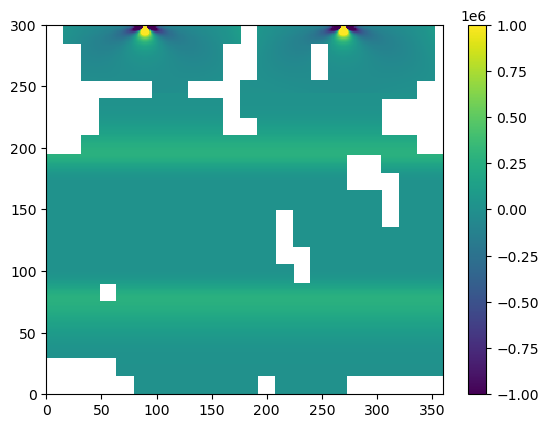

In [23]:
plt.pcolor(grid.tarea.values-ds.tarea.values, vmin=-1e6, vmax=1e6)
plt.colorbar()

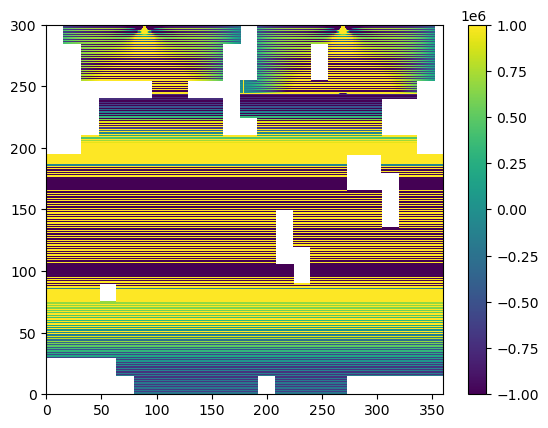

In [28]:
plt.pcolor(grid.uarea.values-ds.uarea.values, vmin=-1e6, vmax=1e6)
plt.colorbar()

Note that neither match

We can also derive areas from mom supergrid

In [29]:
mom_ds = xr.open_dataset('/g/data/ik11/inputs/access-om3/0.x.0/1deg/mom/ocean_hgrid.nc')

In [30]:
mom_ds.area

<xarray.DataArray 'area' (ny: 600, nx: 720)>
[432000 values with dtype=float64]
Dimensions without coordinates: ny, nx
Attributes:
    standard_name:  grid_cell_area
    units:          m2

In [34]:
mom_tarea = mom_ds.area.coarsen(ny=2, nx=2).sum()

In [35]:
mom_tarea

<xarray.DataArray 'area' (ny: 300, nx: 360)>
array([[6.40954519e+08, 6.40954519e+08, 6.40954519e+08, ...,
        6.40954519e+08, 6.40954519e+08, 6.40954519e+08],
       [6.55479360e+08, 6.55479360e+08, 6.55479360e+08, ...,
        6.55479360e+08, 6.55479360e+08, 6.55479360e+08],
       [6.71796417e+08, 6.71796417e+08, 6.71796417e+08, ...,
        6.71796417e+08, 6.71796417e+08, 6.71796417e+08],
       ...,
       [3.83272870e+07, 1.11802998e+08, 1.80809918e+08, ...,
        1.80809918e+08, 1.11802998e+08, 3.83272870e+07],
       [3.83694840e+07, 1.11917601e+08, 1.80981790e+08, ...,
        1.80981790e+08, 1.11917601e+08, 3.83694840e+07],
       [3.83906179e+07, 1.11974990e+08, 1.81067845e+08, ...,
        1.81067845e+08, 1.11974990e+08, 3.83906179e+07]])
Dimensions without coordinates: ny, nx
Attributes:
    standard_name:  grid_cell_area
    units:          m2

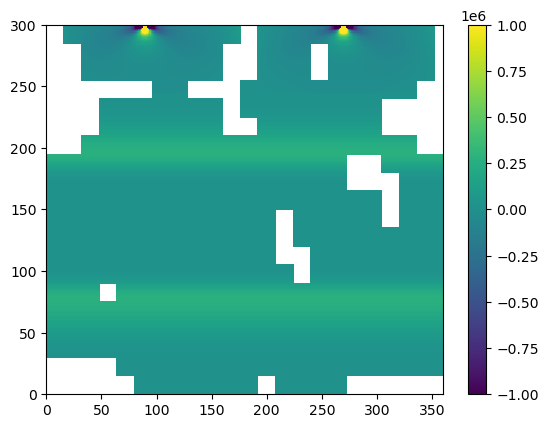

In [36]:
plt.pcolor(mom_tarea.values-ds.tarea.values, vmin=-1e6, vmax=1e6)
plt.colorbar()

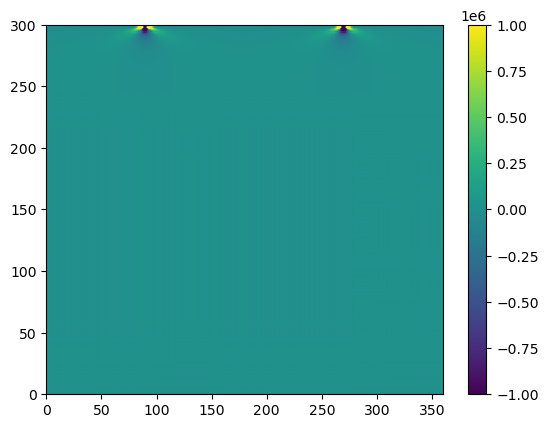

In [56]:
plt.pcolor(mom_tarea.values-grid.tarea.values, vmin=-1e6, vmax=1e6)
plt.colorbar()